In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'pandas'

In [ ]:

data = pd.read_csv('/content/ss.csv')
data.head(50)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
5,i just had to jump in here as carbonara is on...,0
6,the scotsman NUMBER august NUMBER playboy want...,0
7,martin adamson wrote isn t it just basically a...,0
8,the scotsman thu NUMBER aug NUMBER meaningful ...,0
9,i have been trying to research via sa mirrors ...,0


In [ ]:
data['email'].fillna('', inplace=True)

In [ ]:
data['email'] = data['email'].apply(lambda x: x.lower())

In [ ]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(tokens)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['email'] = data['email'].apply(preprocess)

In [ ]:
X = data['email']
y = data['label']

In [ ]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predict = mnb.predict(X_test)
accuracy= accuracy_score(y_test, predict)
c_matrix= confusion_matrix(y_test, predict)
print(f'Multinomial Naive Bayes Accuracy: {(accuracy)*100:.2f}%')
print('Multinomial Naive Bayes Confusion Matrix:')
print(c_matrix)

Multinomial Naive Bayes Accuracy: 99.07%
Multinomial Naive Bayes Confusion Matrix:
[[624   0]
 [  7 119]]


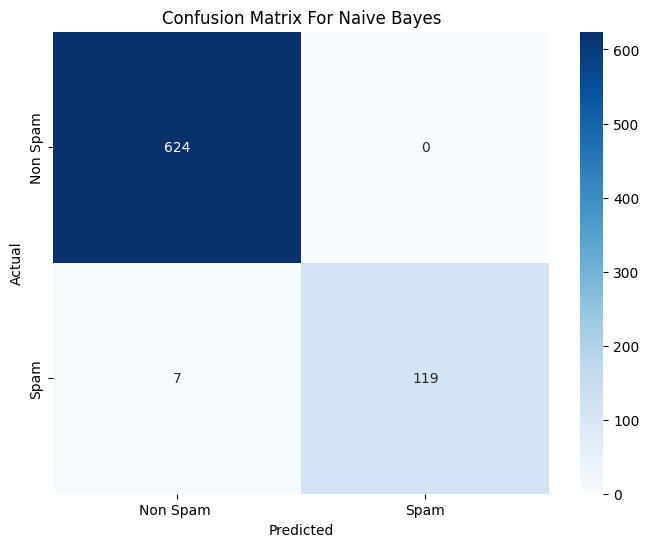

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Spam ', 'Spam'], yticklabels=['Non Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Naive Bayes')
plt.show()

In [ ]:
result_df = pd.DataFrame({'Original Labels': y_test, 'Predicted Label': predict})
print(result_df.head(20))

      Original Labels  Predicted Label
1801                0                0
1190                0                0
1817                0                0
251                 0                0
2505                1                1
1117                0                0
1411                0                0
2113                0                0
408                 0                0
2579                1                1
2254                0                0
52                  0                0
644                 0                0
1763                0                0
2776                1                1
900                 0                0
1073                0                0
472                 0                0
2738                1                0
2546                1                1
